# Analisis Data Perikanan Nasional

***

Sebagai negara maritim terbesar di dunia, Indonesia memiliki potensi perikanan yang begitu besar dan perlu terus digali untuk memperoleh manfaat yang terbaik. Analisis singkat berikut berupaya untuk menelusuri apa saja kegiatan perikanan yang telah dilakukan dan apa pula yang bisa dioptimalkan ke depannya berdasarkan data yang telah dihimpun.

In [181]:
# Import paket yang diperlukan untuk analisis

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

### Normalisasi Data

Sebelum memulai analisis, data perlu terlebih dahulu dinormalisasi untuk menciptakan struktur keterhubungan yang baik dan menghindari ada redundansi.

In [182]:
# Memuat data
konsumsi = pd.read_csv('data-perikanan-nasional/angkakonsumsiikan.csv')
benih = pd.read_csv('data-perikanan-nasional/jumlahproduksibenih.csv')
pembudidaya = pd.read_csv('data-perikanan-nasional/pembudidayaikannasional.csv')
olahan = pd.read_csv('data-perikanan-nasional/produkolahanikan.csv')
budidaya = pd.read_csv('data-perikanan-nasional/produksibudidayanasional.csv')
perlakuan = pd.read_csv('data-perikanan-nasional/produksiperlakuanikannasional.csv')

In [183]:
# Tabel pada cell ini berasal dari file angkakonsumsiikan.csv

# Tabel Data Parameter Konsumsi
Tabel_Parameter_Konsumsi = konsumsi[['ParamKonsumsiIkan', 'Satuan']].copy().drop_duplicates()
Tabel_Parameter_Konsumsi.insert(0, 'ParamID', range(1, 1 + len(Tabel_Parameter_Konsumsi)))

# Tabel Angka Konsumsi
Tabel_Konsumsi = konsumsi[['ParamKonsumsiIkan', 'Tahun', 'Nilai']].copy()

In [184]:
# Tabel pada cell ini berasal dari file jumlahproduksibenih.csv

# Tabel Data Benih
Tabel_Benih = benih[['Benih']].copy().drop_duplicates()
Tabel_Benih.insert(0, 'BenihID', range(1, 1 + len(Tabel_Benih)))

#Tabel Data Budidaya
Tabel_Budidaya = benih[['Budidaya']].copy().drop_duplicates()
Tabel_Budidaya.insert(0, 'BudidayaID', range(1, 1 + len(Tabel_Budidaya)))

# Tabel Produksi Benih
Tabel_Produksi_Benih = benih[['Benih', 'Budidaya', 'Tahun', 'Jumlah']].copy()

In [185]:
# Tabel pada cell ini berasal dari file pembudidayaikannasional.csv

# Tabel Data Provinsi
Tabel_Provinsi = pembudidaya[['ProvinsiID','NamaProvinsi']].drop_duplicates()

# Tabel Pembudidaya
Tabel_Pembudidaya = pembudidaya[['ProvinsiID', 'Budidaya', 'Tahun', 'Jumlah']].copy()

In [186]:
# Tabel pada cell ini berasal dari file produkolahanikan.csv

# Tabel Data Olahan
Tabel_Olahan = olahan[['OlahanID', 'JenisOlahan']].copy().drop_duplicates()

# Tabel Data Jenis Perairan
Tabel_Perairan = olahan[['JenisPerairan']].copy().drop_duplicates()
Tabel_Perairan.insert(0, 'PerairanID', range(1, 1 + len(Tabel_Perairan)))

# Tabel Produksi Olahan
Tabel_Produksi_Olahan = olahan[['JenisOlahan', 'JenisPerairan', 'Tahun', 'Volume']].copy()

In [187]:
# Tabel pada cell ini berasal dari file produksibudidayanasional.csv

# Tabel Data Ikan
Tabel_Ikan = budidaya[['IkanID', 'NamaIkan']].copy().drop_duplicates()

# Tabel Produksi Budidaya
Tabel_Produksi_Budidaya = budidaya[['ProvinsiID', 'NamaProvinsi', 'Budidaya', 'IkanID', 'NamaIkan', 
                                    'Tahun', 'Volume', 'Nilai']].copy()

In [188]:
# Tabel pada cell ini berasal dari file produksiperlakuanikannasional.csv

# Tabel Data Perlakuan Ikan Nasional
Tabel_Perlakuan = perlakuan[['JenisPerlakuan']].copy().drop_duplicates()
Tabel_Perlakuan.insert(0, 'PerlakuanID', range(1, 1 + len(Tabel_Perlakuan)))

# Tabel Produksi Perlakuan Ikan Nasional
Tabel_Produksi_Perlakuan = perlakuan[['ProvinsiID', 'JenisPerlakuan', 'JenisPerairan', 'Tahun', 'Volume']].copy()

***

### Produktivitas Budidaya Ikan

Hal pertama yang menarik untuk ditelusuri adalah seberapa produktif para pembudidaya di masing-masing provinsi dan apa kaitannya dengan jenis output yang dihasilkan. Produktivitas budidaya ikan masing-masing provinsi dapat dilihat dengan membandingkan jumlah pembudidaya dengan output volume budidaya yang dihasilkan berdasarkan data terbaru (2012).

In [189]:
# Membuat kolom data jumlah pembudidaya semua provinsi tahun 2012
Jumlah_Pembudidaya = Tabel_Pembudidaya.loc[Tabel_Pembudidaya['Tahun'] == 2012][['ProvinsiID', 'Jumlah']]

# Membuat kolom data volume budidaya semua provinsi tahun 2012
Volume_Budidaya = Tabel_Produksi_Budidaya.loc[(Tabel_Produksi_Budidaya['Tahun'] 
                                               == 2012) & (Tabel_Produksi_Budidaya['IkanID'] == 0)][['ProvinsiID','NamaProvinsi', 'Volume']]

# Membuat tabel berisi produktivitas pembudidaya masing-masing provinsi
Tabel_Produktivitas = pd.merge(Jumlah_Pembudidaya, Volume_Budidaya)
Tabel_Produktivitas['Produktivitas'] = Tabel_Produktivitas['Volume']/Tabel_Produktivitas['Jumlah']
Tabel_Produktivitas.sort_values(by=['Produktivitas'], ascending=False).head()

,ProvinsiID,Jumlah,NamaProvinsi,Volume,Produktivitas
30,82,6020,Maluku Utara,122900,20.415282
24,72,70494,Sulawesi Tengah,929215,13.181476
23,71,20012,Sulawesi Utara,212160,10.601639
29,81,54870,Maluku,477484,8.702096
25,73,316560,Sulawesi Selatan,2235007,7.060295


Maluku Utara memuncaki daftar produktivitas pembudidaya, jauh di atas provinsi lain. Lantas, jenis output apa yang dihasilkan oleh para pembudidaya di Maluku Utara sehingga bisa seproduktif itu? Ini bisa dicek dengan membadingkan tiap jenis output di Maluku Utara sebagai berikut.

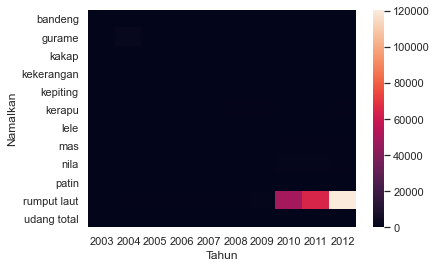

In [191]:
#Eksplorasi kesuksesan Maluku Utara dengan heatmap
Malut = Tabel_Produksi_Budidaya.loc[(Tabel_Produksi_Budidaya['ProvinsiID'] == 82) & (Tabel_Produksi_Budidaya['IkanID'] != 0) 
                                        & (Tabel_Produksi_Budidaya['IkanID'] != 31)]
Malut_pivot = pd.pivot_table(Malut, values='Volume', index='NamaIkan', columns='Tahun')
ax = sns.heatmap(Malut_pivot, vmin=0, vmax=120430)

Dari heatmap di atas, terlihat bahwa rumput laut merupakan jenis output terbesar yang dihasilkan para pembudidaya di Maluku Utara, jauh di atas output lain.

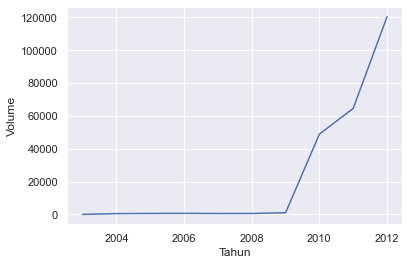

In [193]:
RumputLaut_Malut = Malut[Malut['IkanID'] == 29]

ax = sns.lineplot(x='Tahun' , y='Volume', data=RumputLaut_Malut)

Output rumput laut di Maluku Utara melonjak tajam sejak tahun 2010. Perlu ditelusuri penyebab peningkatan yang besar ini dan hasilnya bisa diterapkan di daerah lain yang memiliki situasi dan kondisi serupa.

***

### Nilai Budidaya Ikan Nasional

Selain produktivitas secara volume, kita juga bisa menelusuri nilai output yang dihasilkan masing-masing provinsi. Nilai budidaya ikan masing-masing provinsi dapat dilihat dengan membandingkan jumlah pembudidaya dengan output nilai budidaya yang dihasilkan berdasarkan data terbaru (2012).

In [194]:
# Membuat kolom data nilai budidaya semua provinsi tahun 2012
Nilai_Budidaya = Tabel_Produksi_Budidaya.loc[(Tabel_Produksi_Budidaya['Tahun'] 
                                               == 2012) & (Tabel_Produksi_Budidaya['IkanID'] == 0)][['ProvinsiID','NamaProvinsi', 'Nilai']]

# Membuat tabel berisi nilai output budidaya masing-masing provinsi
Tabel_Nilai = pd.merge(Jumlah_Pembudidaya, Nilai_Budidaya)
Tabel_Nilai['NilaiPerKapita'] = Tabel_Nilai['Nilai']/Tabel_Produktivitas['Jumlah']
Tabel_Nilai.sort_values(by=['NilaiPerKapita'], ascending=False).head()

,ProvinsiID,Jumlah,NamaProvinsi,Nilai,NilaiPerKapita
7,18,47183,Lampung,3.516523e+09,74529.449738
21,63,43110,Kalimantan Selatan,2.353196e+09,54585.856414
23,71,20012,Sulawesi Utara,1.051494e+09,52543.182590
30,82,6020,Maluku Utara,2.763608e+08,45907.117110
6,17,18788,Bengkulu,6.930719e+08,36889.074409


Lampung muncul sebagai provinsi dengan nilai output budidaya per kapita terbesar dibanding provinsi lain. Sementara Maluku Utara yang produktivitasnya jauh lebih tinggi hanya berada di posisi ke-4. Karena itu, kita perlu menelusuri jenis budidaya apa yang menjadi andalan Lampung sehingga bisa memberikan nilai yang tinggi tersebut.

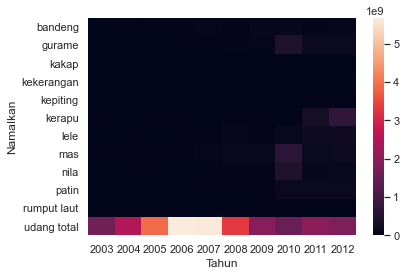

In [162]:
#Eksplorasi kesuksesan Lampung
Lampung = Tabel_Produksi_Budidaya.loc[(Tabel_Produksi_Budidaya['ProvinsiID'] == 18) & (Tabel_Produksi_Budidaya['IkanID'] != 0) 
                                        & (Tabel_Produksi_Budidaya['IkanID'] != 31)]
Lampung_pivot = pd.pivot_table(Lampung, values='Nilai', index='NamaIkan', columns='Tahun')
ax = sns.heatmap(Lampung_pivot, vmin=0, vmax=5674136997)

Secara rata-rata, output udang total yang dihasilkan Lampung jauh mengungguli jenis ikan lain dari segi nilai yang diperoleh. Ini tidak mengejutkan mengingat udang dengan berbagai jenisnya termasuk barang yang dihargai dengan tinggi bagi konsumen.

### Executive Summary

In [86]:
# Memuat shapefile
fp = "IDN_adm/IDN_adm1.shp"
map_df = gpd.read_file(fp)

In [167]:
# Menggabungkan geodataframe dengan data Produktivitas
merged_prod = map_df.merge(Tabel_Produktivitas, how='left', left_on="NAME_1", right_on="NamaProvinsi")
merged_prod = merged_prod[['NamaProvinsi', 'geometry', 'Produktivitas']]

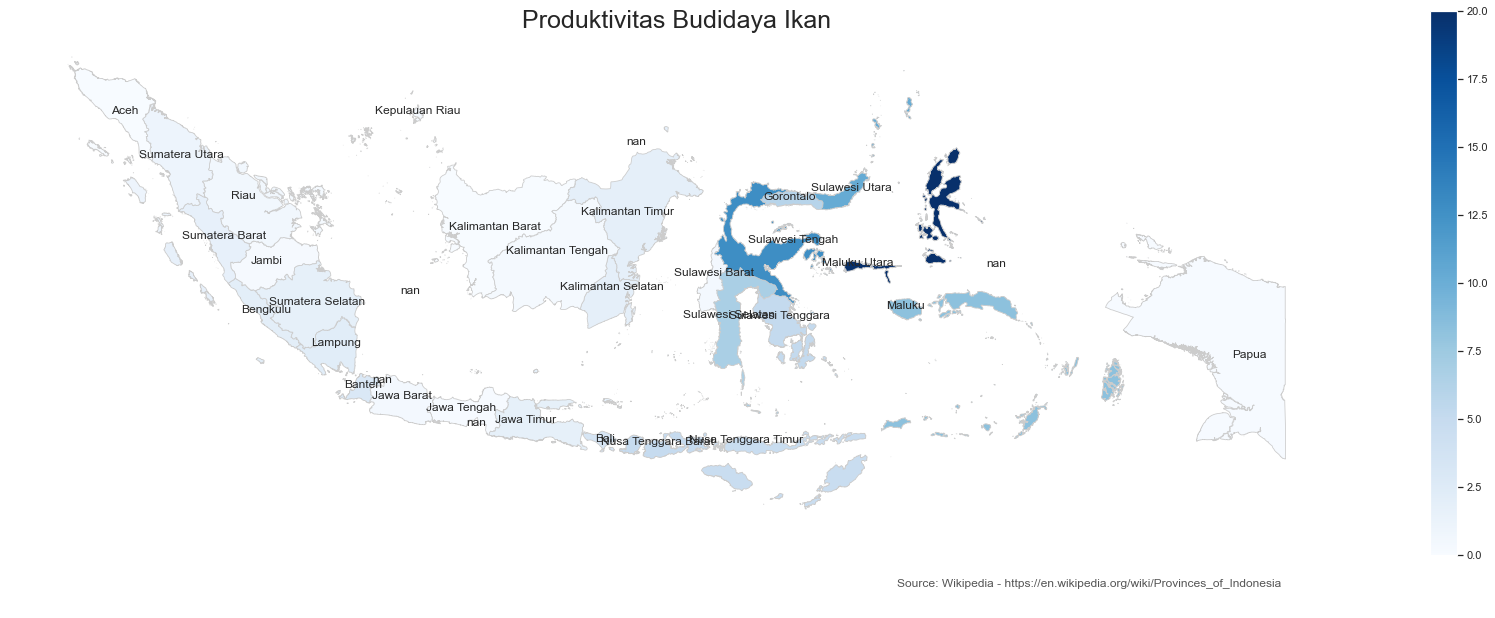

In [171]:
# Menentukan nilai yang akan divisualisasikan
variable = 'Produktivitas'
# Menentukan rentang nilai choropleth
vmin, vmax = 0, 20
# Membuat figure and axes untuk Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')

# Menambahkan judul dan annotation
ax.set_title('Produktivitas Budidaya Ikan', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Membuat legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([]) 
fig.colorbar(sm)

# Membuat peta
merged_prod.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Menambahkan label
merged_prod['coords'] = merged_prod['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_prod['coords'] = [coords[0] for coords in merged_prod['coords']]

for idx, row in merged_prod.iterrows():
    plt.annotate(text=row['NamaProvinsi'], xy=row['coords'],horizontalalignment='center')

Di antara semua provinsi di Indonesia, Maluku Utara muncul sebagai provinsi dengan rata-rata produktivitas pembudidaya tertinggi dengan rumput laut sebagai output andalannya. Menariknya, provinsi lain dengan tingkat produktivitas tinggi terletak saling berdekatan yakni di gugus pulau Maluku hingga Sulawesi. Ini bisa menjadi perhatian agar potensi di daerah tersebut dapat dikembangkan lebih jauh lagi. Selain rumput laut, udang dan kerapu juga menjadi output yang dapat diandalkan di daerah ini.

In [177]:
# Menggabungkan geodataframe dengan data Nilai
merged_nilai= map_df.merge(Tabel_Nilai, how='left', left_on="NAME_1", right_on="NamaProvinsi")
merged_nilai = merged_nilai[['NamaProvinsi', 'geometry', 'NilaiPerKapita']]

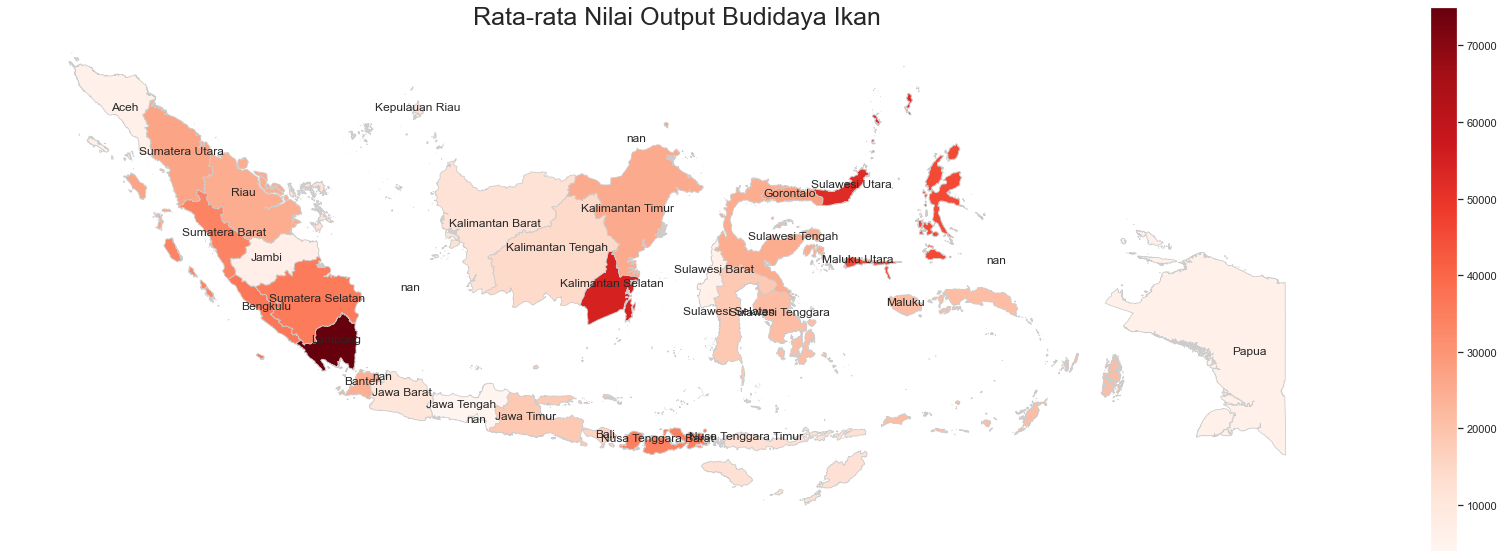

In [195]:
# Menentukan nilai yang akan divisualisasikan
variable = 'NilaiPerKapita'
# Menentukan rentang nilai choropleth
vmin, vmax = 4000, 75000
# Membuat figure and axes untuk Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')

# Menambahkan judul dan annotation
ax.set_title('Rata-rata Nilai Output Budidaya Ikan', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Membuat legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([]) 
fig.colorbar(sm)

# Membuat peta
merged_nilai.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

# Menambahkan label
merged_nilai['coords'] = merged_prod['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_nilai['coords'] = [coords[0] for coords in merged_prod['coords']]

for idx, row in merged_prod.iterrows():
    plt.annotate(text=row['NamaProvinsi'], xy=row['coords'],horizontalalignment='center')

Tidak seperti produktivitas, provinsi-provinsi dengan rata-rata nilai output tertinggi tersebar ke berbagai daerah di Indonesia, mulai dari Sumatra, Kalimantan, hingga kepulauan Maluku. Lampung muncul sebagai pemimpin pada kategori ini dengan berbagai jenis udang sebagai output andalannya. Semua provinsi dengan rata-rata output yang tinggi memiliki karakter yang sama, yakni unggul dalam produksi udang dan kerapu. Ini bisa menjadi contoh bagi daerah lain yang ingin mengejar ketertinggalan.